In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [54]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
import os
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.ipynb_checkpoints',
 'calc_csat.py',
 'cluster_assignment.csv.gz',
 'doc',
 'master model notebook.ipynb',
 'mechanism_json',
 'mechanism_out',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_equations_separate_NC.py',
 'model_equations_separate_NC_sep_vmax.py',
 'model_NC_analyze_clusters.ipynb',
 'model_NC_cc.ipynb',
 'model_NC_cc_mechanisms.ipynb',
 'model_NC_cc_optimize.ipynb',
 'model_NC_honly.ipynb',
 'model_NC_lookup before signal resp.ipynb',
 'model_NC_lookup.ipynb',
 'model_NC_ponly.ipynb',
 'model_NC_salib.ipynb',
 'model_noquota_cc.ipynb',
 'model_noquota_honly.ipynb',
 'model_noquota_ponly.ipynb',
 'Model_Parameters.xlsx',
 'model_param_sensitivity.ipynb',
 'model_param_sensitivity_ponly.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'param_values_log.txt.gz',
 'prelim_bottle.csv',
 'prepare_data',
 'README.md',
 'reference_10cc.xlsx',
 'results_postprocess.py',
 'run_fi

In [7]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [8]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
os.listdir(dpath)

['param_sensitivity_29062023_df.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz']

In [9]:

sum_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_df.csv.gz' ))




In [10]:
df.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Xp', 'limINp', 'limONp', 'limICp', 'limOCp',
       'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'net_uptakeNp', 'overflowNp', 'overflowCp', 'deathp',
       'leakinessOp', 'leakinessIp', 'ROSreleasep', 'respirationp',
       'dic_air_water_exchange', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id', 'Bh',
       'Xh', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh', 'net_uptakeNh',
       'overflowNh', 'overflowCh', 'deathh', 'leakinessOh', 'leakinessIh',
       'ROSbreakdownh', 'respirationh', 'exp(-omegaP*ROS)', 'Bh[C]'],
      dtype='object')

In [11]:
ponlydf =  df.loc[df.run_id.str.contains('_ponly_')]

In [12]:
ponly_sum_df =  sum_df.loc[sum_df.run_id.str.contains('_ponly_') & ~sum_df.run_id.str.contains('_HET_')].copy()
ponlydf =  df.loc[df.run_id.str.contains('_ponly_') & ~df.run_id.str.contains('_HET_')].copy()

In [13]:
ponly_sum_df['run_id'].unique()

array(['param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxICp_4_h-6339873873566414661',
       'param_sensitivity_ponly_FULL_PRO_FULL_Mp_1_h5988958101455714847',
       'param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_5_h745818283540321754',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_KINp_0_h-1985130526713526465',
       'param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_15_h-7159845802283383659',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_KICp_7_h4769606317293665789',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_10_h3294892648061130894',
       'param_sensitivity_ponly_MIN_PRO_MIN_KINp_8_h2857973285050241431',
       'param_sensitivity_ponly_MIN_PRO_MIN_gammaDp_8_h-1144943849246832335',
       'param_sensitivity_ponly_MIN_PRO_MIN_VmaxICp_18_h6474893277231313823',
       'param_sensitivity_ponly_FULL_PRO_FULL_KABp_15_h-5199587473491953030',
       'param_sensitivity_ponly_MIXO_PRO_MIXO_Mp_9_h7107750570031241536',
       'param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_7_h4491245842262922118',


In [14]:
#param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_11_h544066040463290079

ponly_sum_df[['sen_param_model', 'idx']] = ponly_sum_df.run_id.str.replace('.*_PRO_', '', regex=True
            ).str.replace(r'_h[\-]?\d+$','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [15]:
ponly_sum_df[['model', 'sen_param']] = ponly_sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [16]:
#param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_11_h544066040463290079

ponlydf[['sen_param_model', 'idx']] = ponlydf.run_id.str.replace('.*_PRO_', '', regex=True
            ).str.replace(r'_h[\-]?\d+$','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [17]:
ponlydf[['model', 'sen_param']] = ponlydf.sen_param_model.str.split('_', n=1, expand=True)

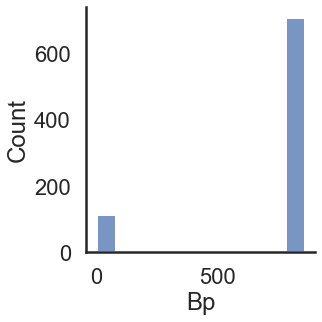

In [18]:
sns.displot(ponlydf.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [19]:
def _mse(refdf, x, refcol= 'ref_Bp', col='Bp', timecol='t'):
    #print(x.columns)
    tdf = pd.merge_asof(x[[timecol, col]], refdf[[timecol, refcol]], on=timecol, direction='nearest', tolerance=3600*4).dropna()
    return pd.Series({
        'compare_points': tdf.shape[0], 
        'MSE': mean_squared_error(tdf[col], tdf[refcol])}
    )


In [20]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

In [21]:
def _mse_all(x):
    #print (x)
    return refdf.groupby(['Sample', 'id', 'full name', 'Group',]).apply(lambda y : _mse(y,x))

In [22]:
mse_df = ponlydf.groupby(['sen_param', 'model', 'idx', 'run_id' ]).apply(lambda x : _mse_all(x))

In [57]:
mse_df = ponlydf.groupby(['sen_param', 'model', 'idx', 'run_id' ]).apply(lambda x : compute_mse(x, refdf))

In [58]:
mse_df

compare_points  \
sen_param model idx run_id                                             Sample id full name                      Group                              
EABp      FULL  0   param_sensitivity_ponly_FULL_PRO_FULL_EABp_0_h-... 10A0   10 Marinovum 5F3                  Inhibited Viable             4.0   
                                                                       10B0   10 Marinovum 5F3                  Inhibited Viable             4.0   
                                                                       10C0   10 Marinovum 5F3                  Inhibited Viable             4.0   
                                                                       11A0   11 Roseovarius 5C3                Inhibited                    4.0   
                                                                       11B0   11 Roseovarius 5C3                Inhibited                    4.0   
...                                                                                                                                          ...   
omegaP    FULL  9   param_sensitivity_ponly_FULL_PRO_FULL_omegaP_9_... 7B0    7  Sulfitobacter pseudonitzschiae Strong                       4.0   
                                                                       7C0    7  Sulfitobacter pseudonitzschiae Strong                       4.0   
                                                                       9A0    9  E. coli                        Inhibited Viable             4.0   
                                                                       9B0    9  E. coli                        Inhibited Viable             4.0   
                                                                       9C0    9  E. coli                        Inhibited Viable             4.0   

                                                                                                                                         MSE  
sen_param model idx run_id                                             Sample id full name                      Group                         
EABp      FULL  0   param_sensitivity_ponly_FULL_PRO_FULL_EABp_0_h-... 10A0   10 Marinovum 5F3                  Inhibited Viable  151.845498  
                                                                       10B0   10 Marinovum 5F3                  Inhibited Viable  177.271686  
                                                                       10C0   10 Marinovum 5F3                  Inhibited Viable  106.038977  
                                                                       11A0   11 Roseovarius 5C3                Inhibited         128.649313  
                                                                       11B0   11 Roseovarius 5C3                Inhibited         154.631162  
...                                                                                                                                      ...  
omegaP    FULL  9   param_sensitivity_ponly_FULL_PRO_FULL_omegaP_9_... 7B0    7  Sulfitobacter pseudonitzschiae Strong            120.834687  
                                                                       7C0    7  Sulfitobacter pseudonitzschiae Strong            121.814218  
                                                                       9A0    9  E. coli                        Inhibited Viable  134.234941  
                                                                       9B0    9  E. coli                        Inhibited Viable  140.348328  
                                                                       9C0    9  E. coli                        Inhibited Viable   62.148576  

[24630 rows x 2 columns]

In [23]:
mse_df = mse_df.reset_index()

In [24]:
msefilter_df = mse_df.loc[(mse_df.compare_points>20) & mse_df.Group.isin(['Axenic'])]

In [25]:
msefilter_df.sort_values('MSE').groupby('model').head(7).sort_values(['model', 'MSE'])

,sen_param,model,idx,run_id,Sample,id,full name,Group,compare_points,MSE
16296,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,114.011222
16326,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,120.944405
16297,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1B0,1,Axenic,Axenic,164.0,144.681760
16328,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1C0,1,Axenic,Axenic,164.0,147.990424
2496,E_ROSp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...,1A0,1,Axenic,Axenic,164.0,150.577655
2526,E_ROSp,FULL,12,param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...,1A0,1,Axenic,Axenic,164.0,150.900760
24126,omegaP,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...,1A0,1,Axenic,Axenic,164.0,151.795760
12006,Mp,LEAK,0,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_0_h91...,1A0,1,Axenic,Axenic,164.0,168.004914
12036,Mp,LEAK,1,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_1_h-6...,1A0,1,Axenic,Axenic,164.0,170.950261
12366,Mp,LEAK,2,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_2_h-7...,1A0,1,Axenic,Axenic,164.0,176.579816


In [26]:
msefilter_df.nsmallest(columns='MSE', n=20)

,sen_param,model,idx,run_id,Sample,id,full name,Group,compare_points,MSE
16296,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,114.011222
16326,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,120.944405
18126,VmaxINp,MIXO,11,param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,141.052151
16297,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1B0,1,Axenic,Axenic,164.0,144.681760
16328,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1C0,1,Axenic,Axenic,164.0,147.990424
2496,E_ROSp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...,1A0,1,Axenic,Axenic,164.0,150.577655
2526,E_ROSp,FULL,12,param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...,1A0,1,Axenic,Axenic,164.0,150.900760
24126,omegaP,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...,1A0,1,Axenic,Axenic,164.0,151.795760
24156,omegaP,FULL,12,param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...,1A0,1,Axenic,Axenic,164.0,153.268338
2466,E_ROSp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...,1A0,1,Axenic,Axenic,164.0,154.371878


In [27]:
ponlydf.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Xp', 'limINp', 'limONp', 'limICp', 'limOCp',
       'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'net_uptakeNp', 'overflowNp', 'overflowCp', 'deathp',
       'leakinessOp', 'leakinessIp', 'ROSreleasep', 'respirationp',
       'dic_air_water_exchange', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id', 'Bh',
       'Xh', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh', 'net_uptakeNh',
       'overflowNh', 'overflowCh', 'deathh', 'leakinessOh', 'leakinessIh',
       'ROSbreakdownh', 'respirationh', 'exp(-omegaP*ROS)', 'Bh[C]',
       'sen_param_model', 'idx', 'model', 'sen_param'],
      dtype='object')

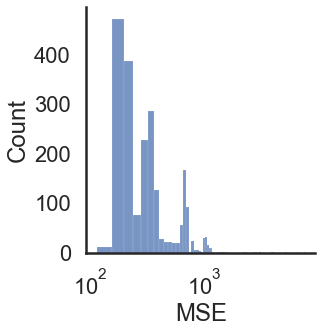

In [28]:
sns.displot(msefilter_df.MSE,)
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [29]:
ponlydf.min()

Unnamed: 0                                                                0
Bp                                                                      0.0
DON                                                                0.018419
RDON                                                                    0.0
DIN                                                                0.003807
DOC                                                               93.727911
RDOC                                                                    0.0
DIC                                                                0.012707
ROS                                                                0.019278
ABp                                                                     0.0
ABh                                                                     0.0
t                                                                       0.0
day                                                                     0.0
Xp          

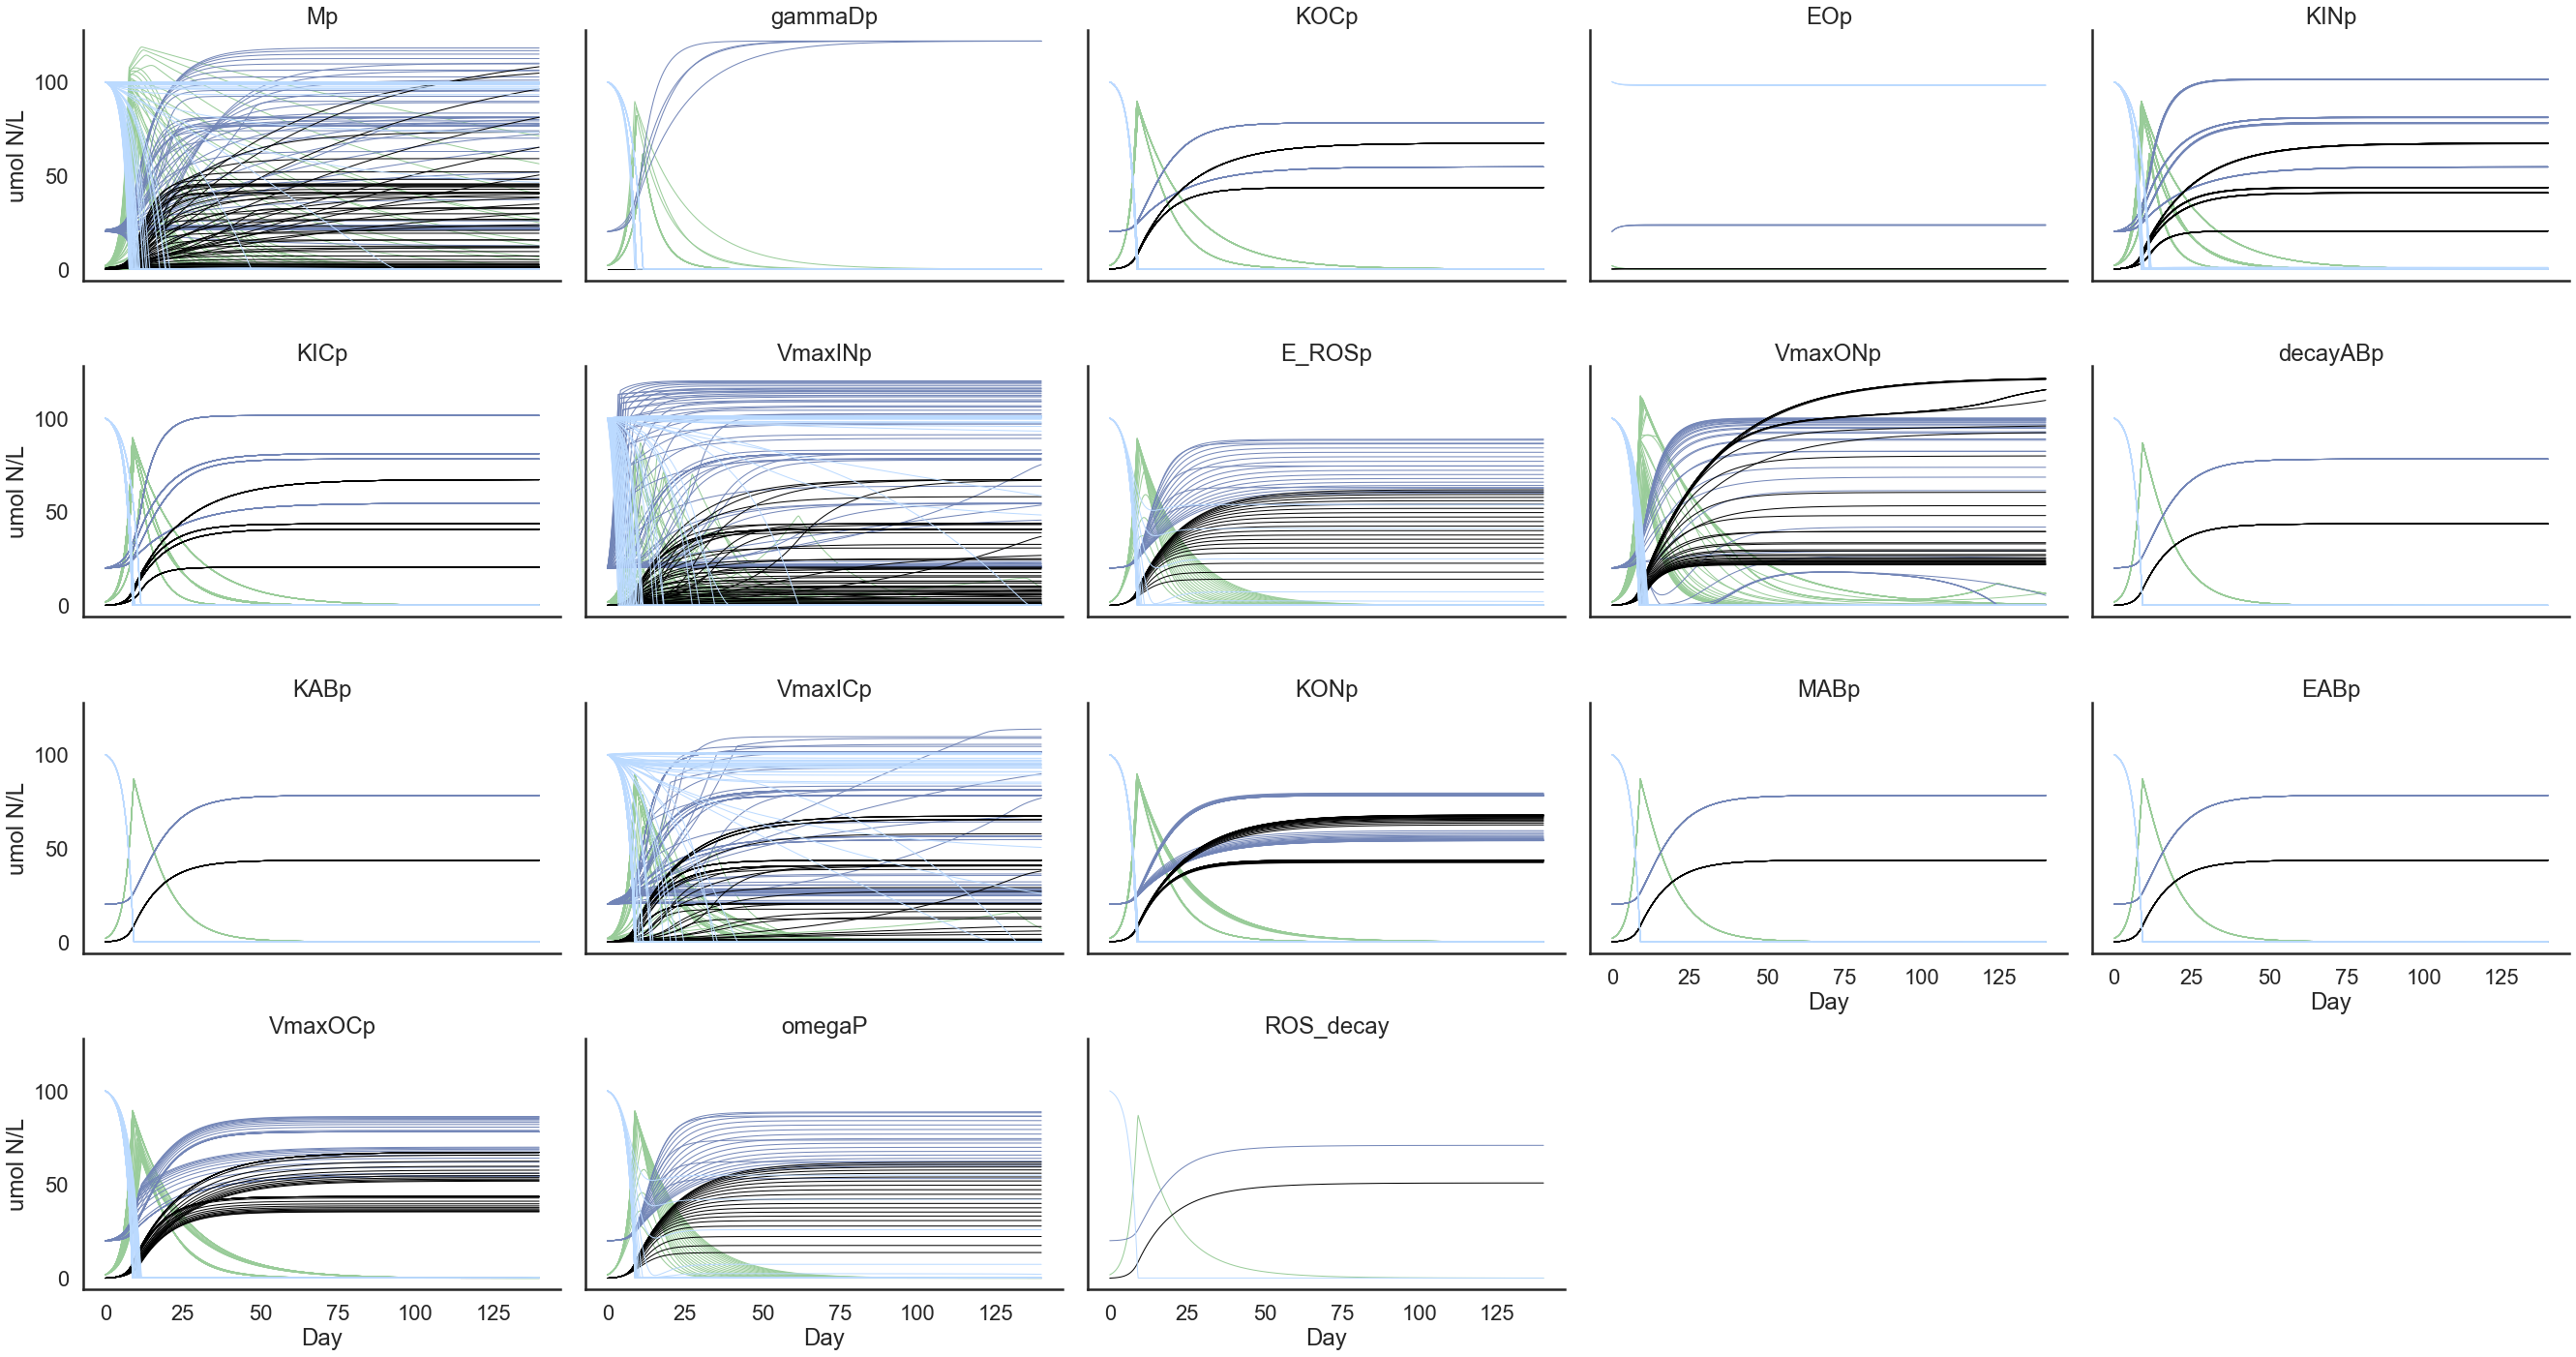

In [30]:
mdf2 = ponlydf.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

#mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', #col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)
plt.show()

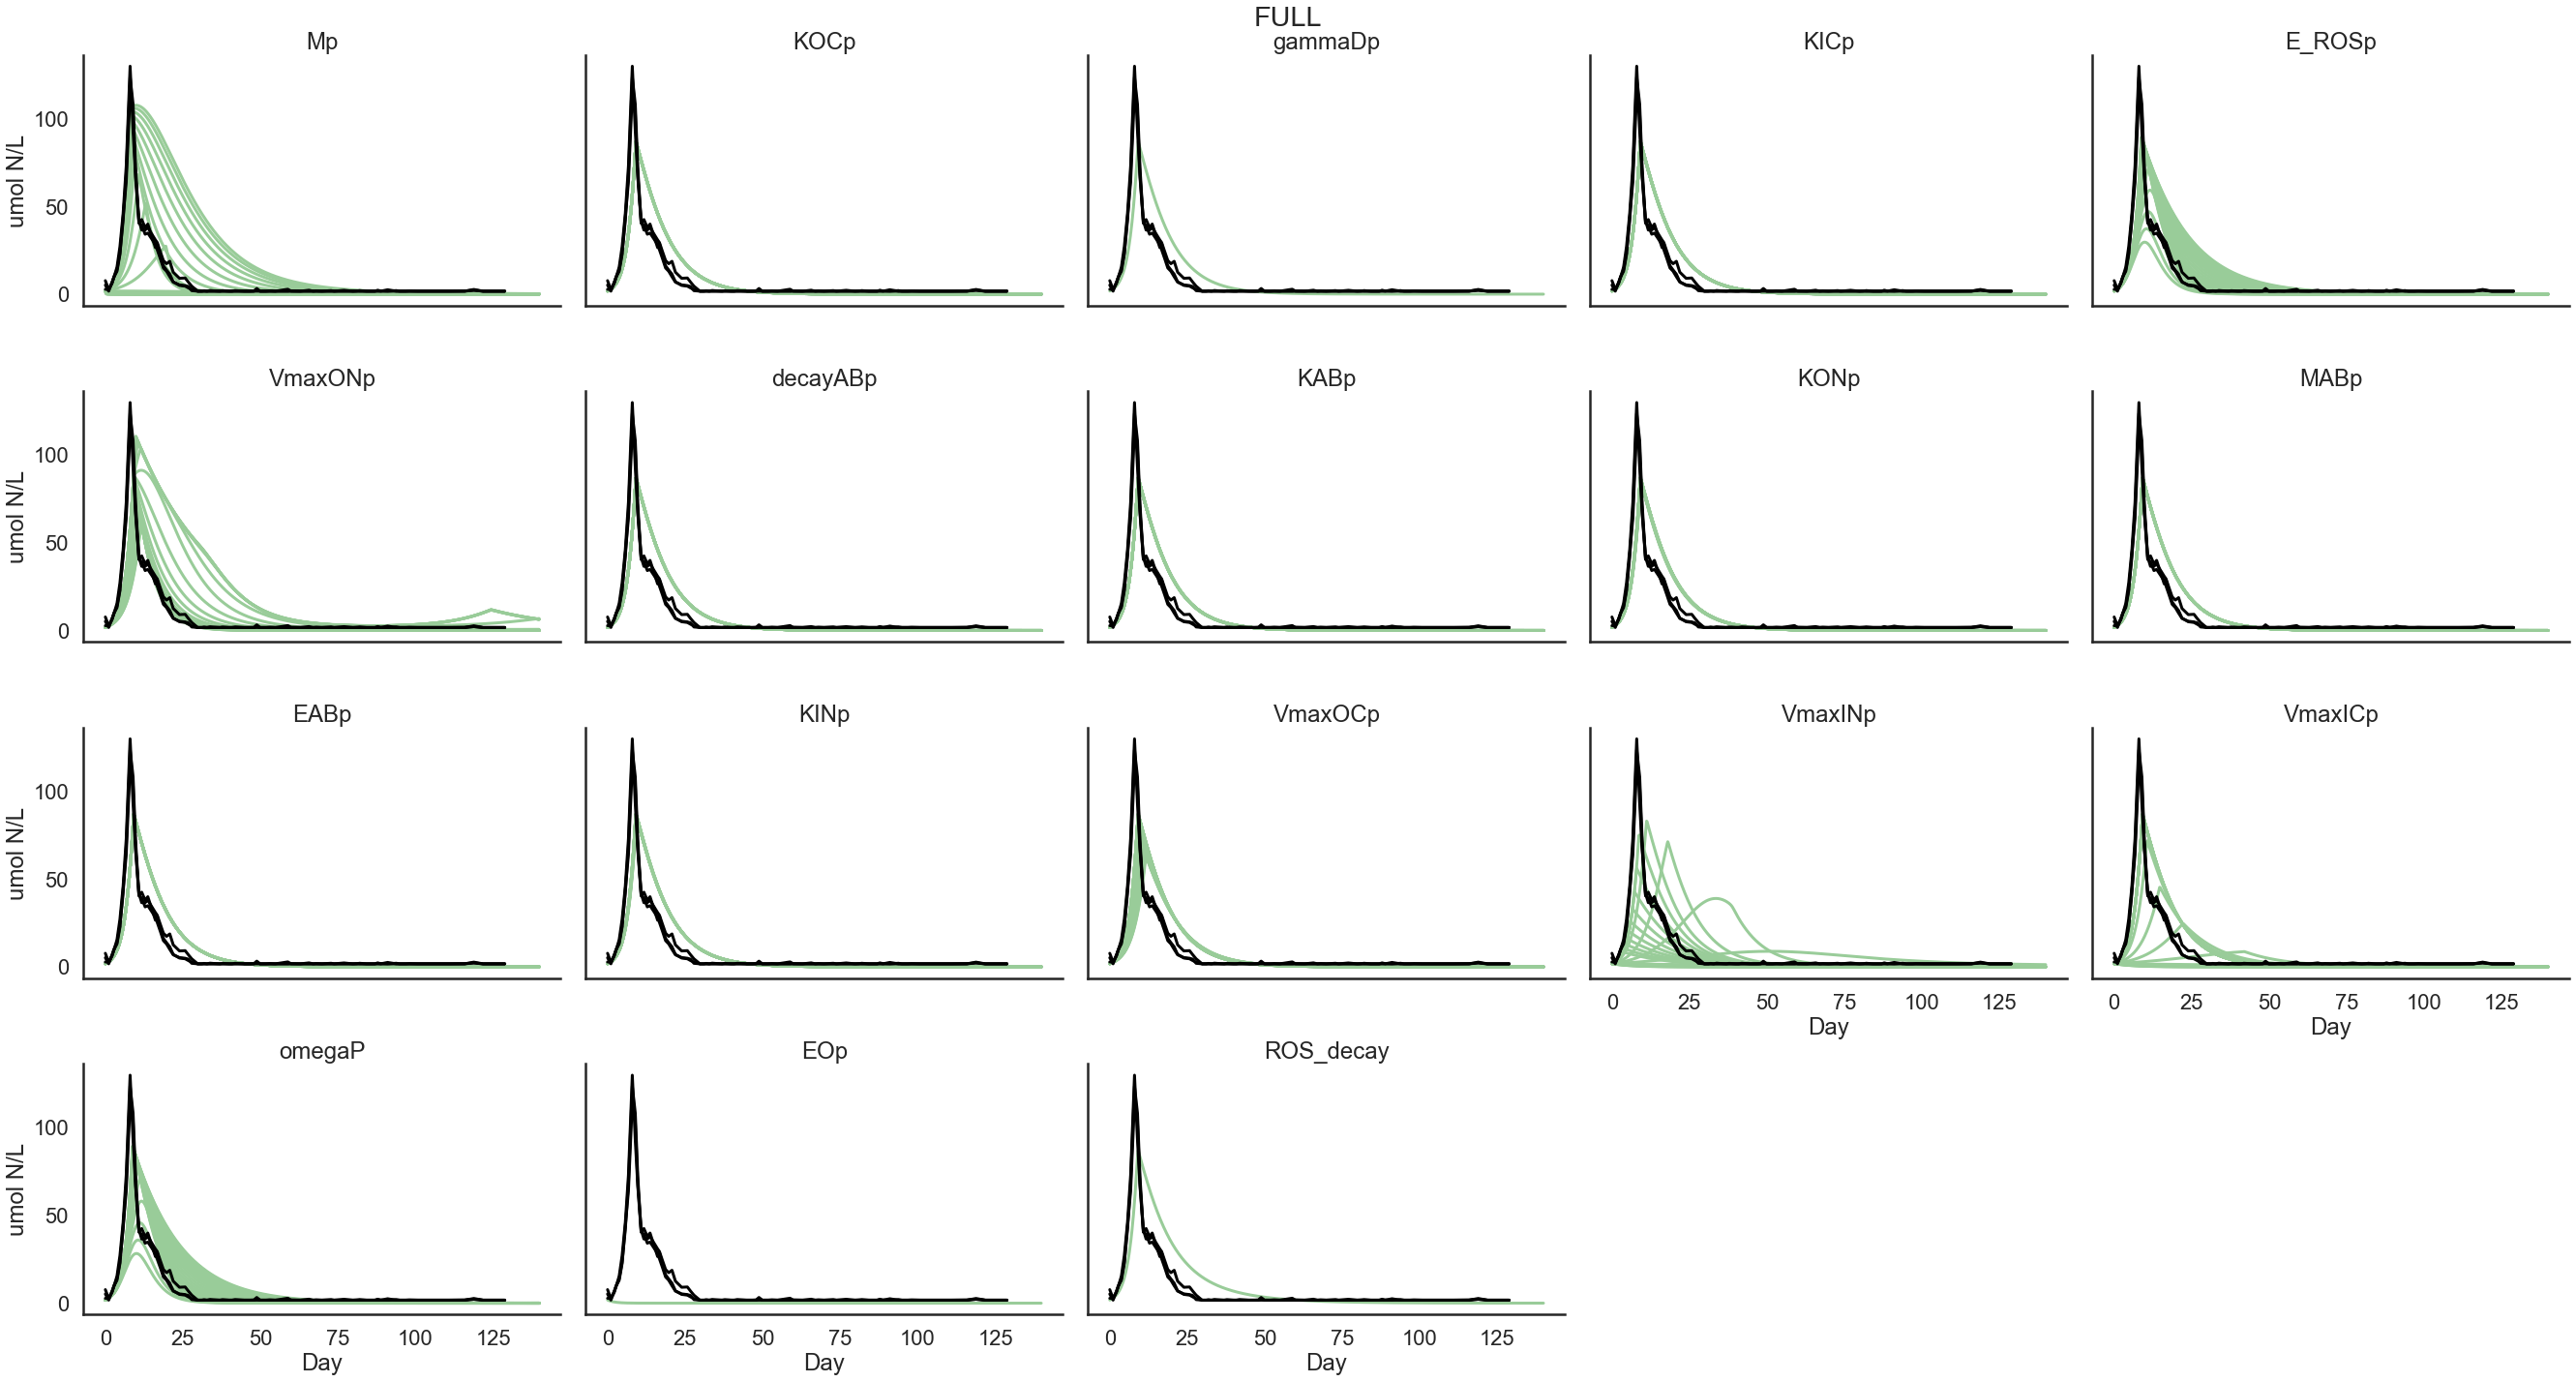

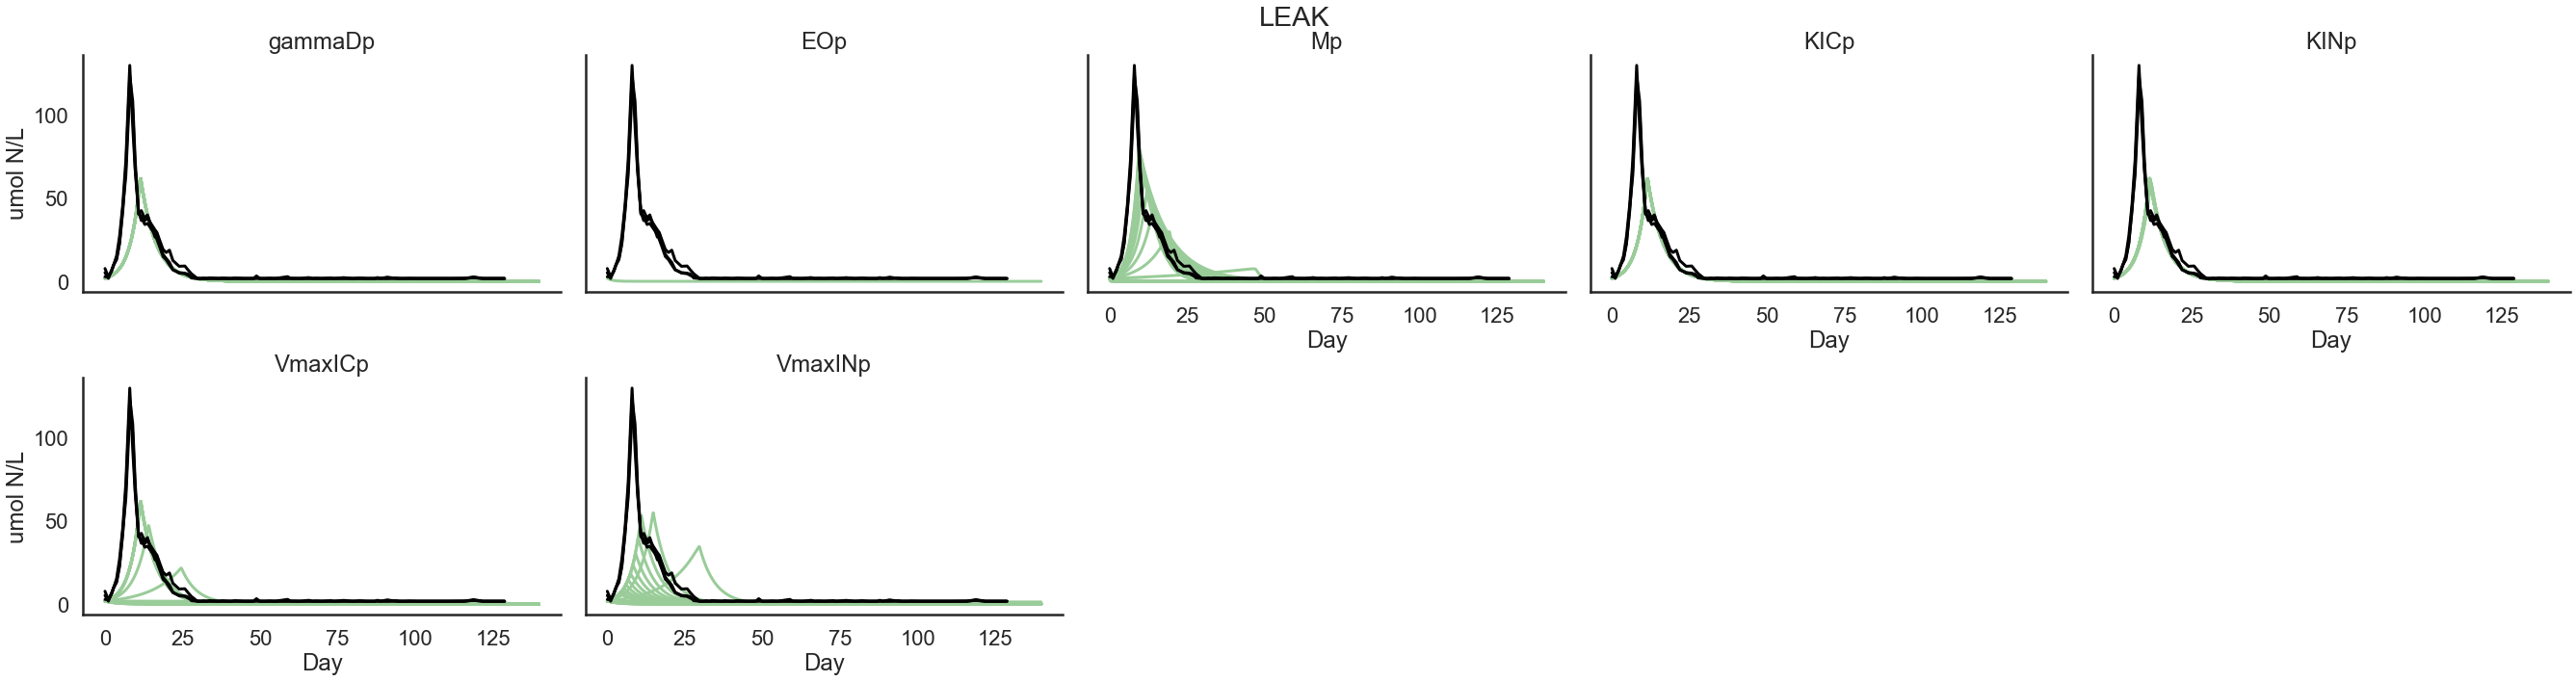

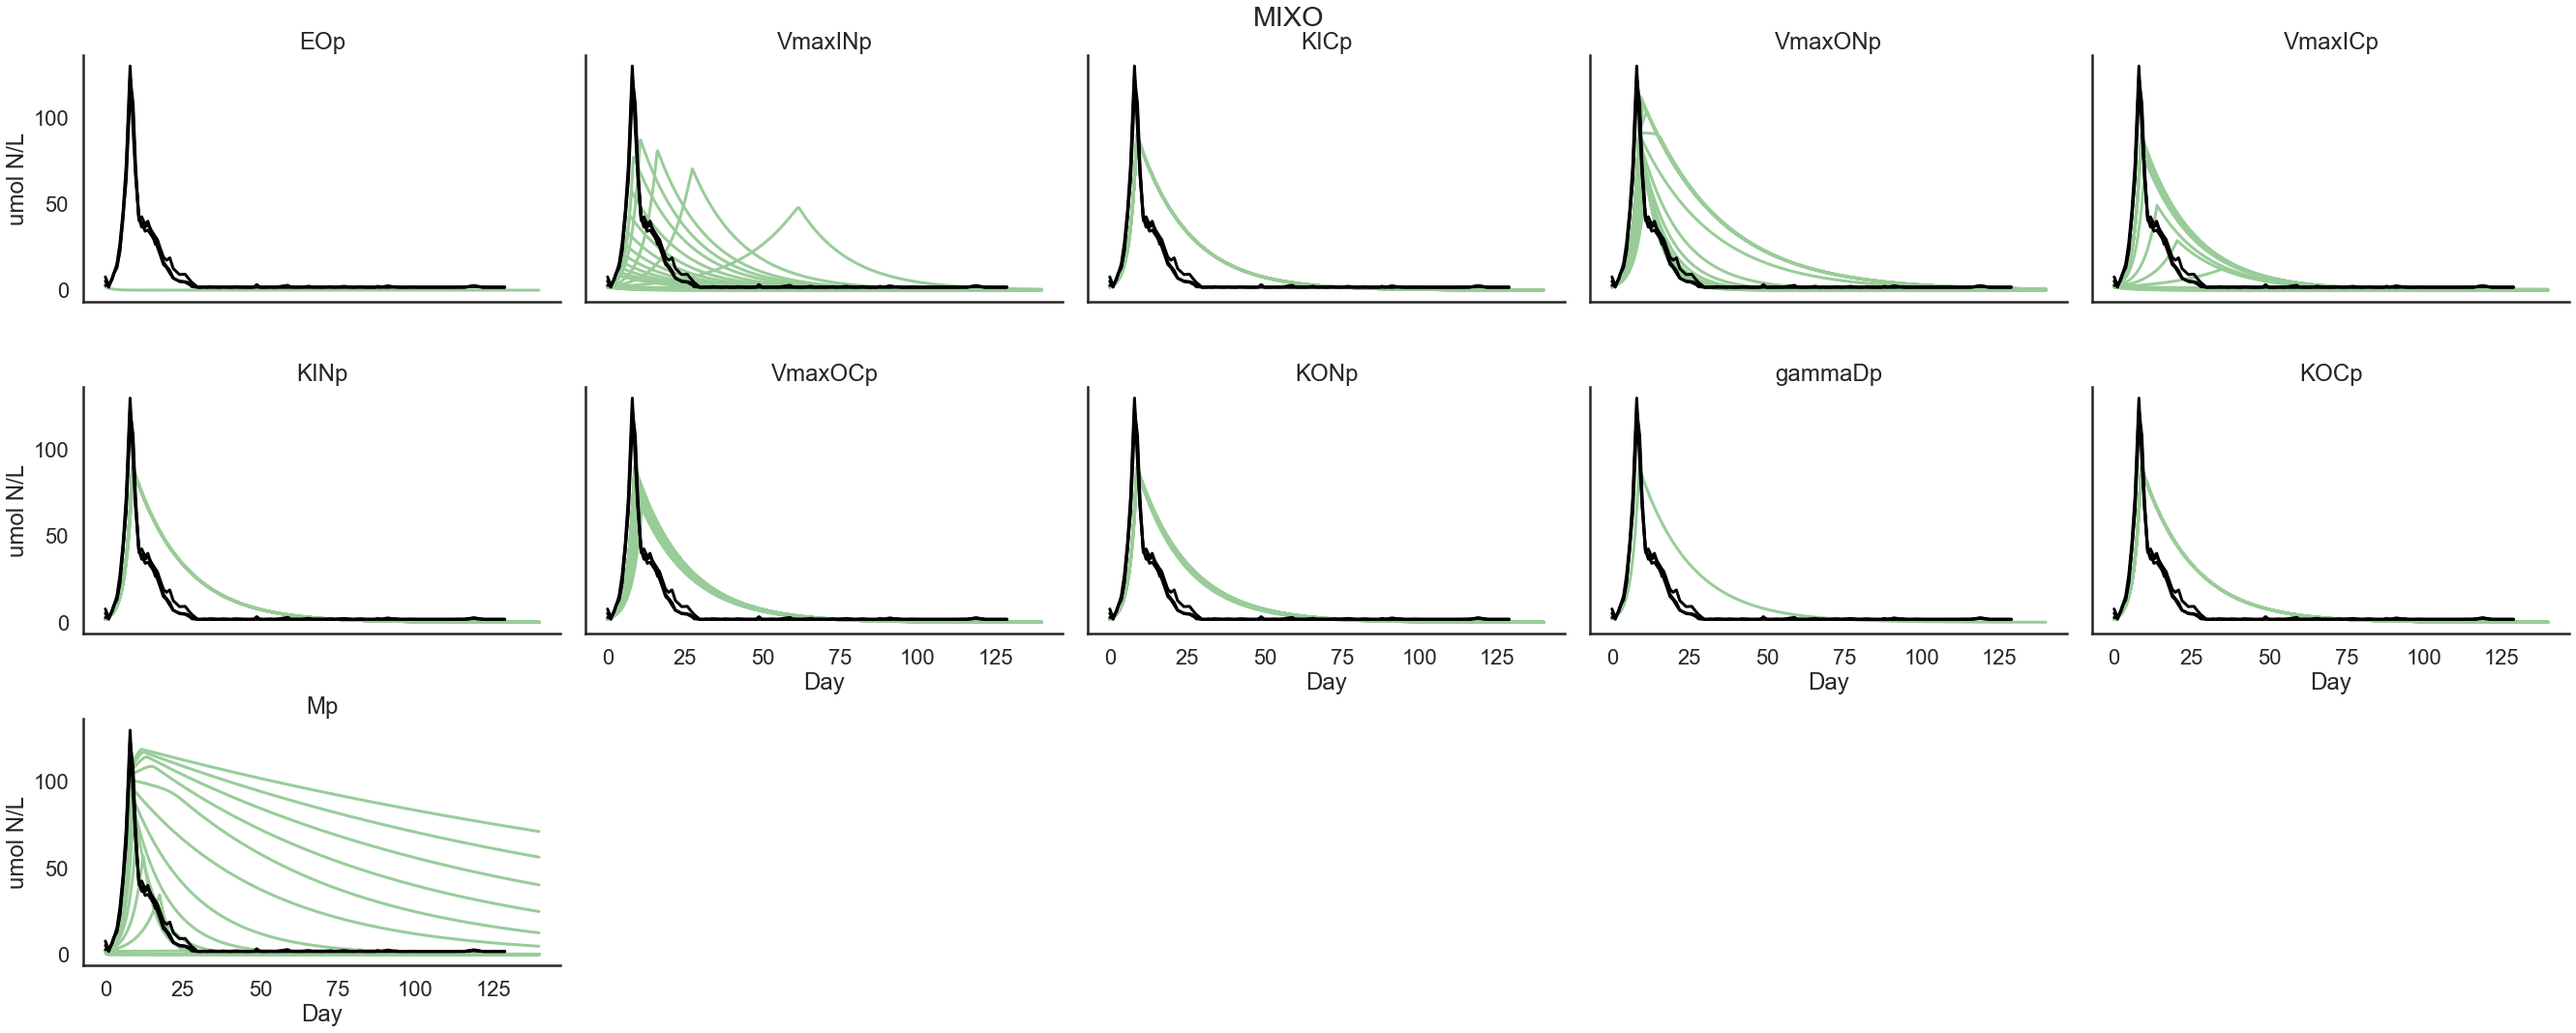

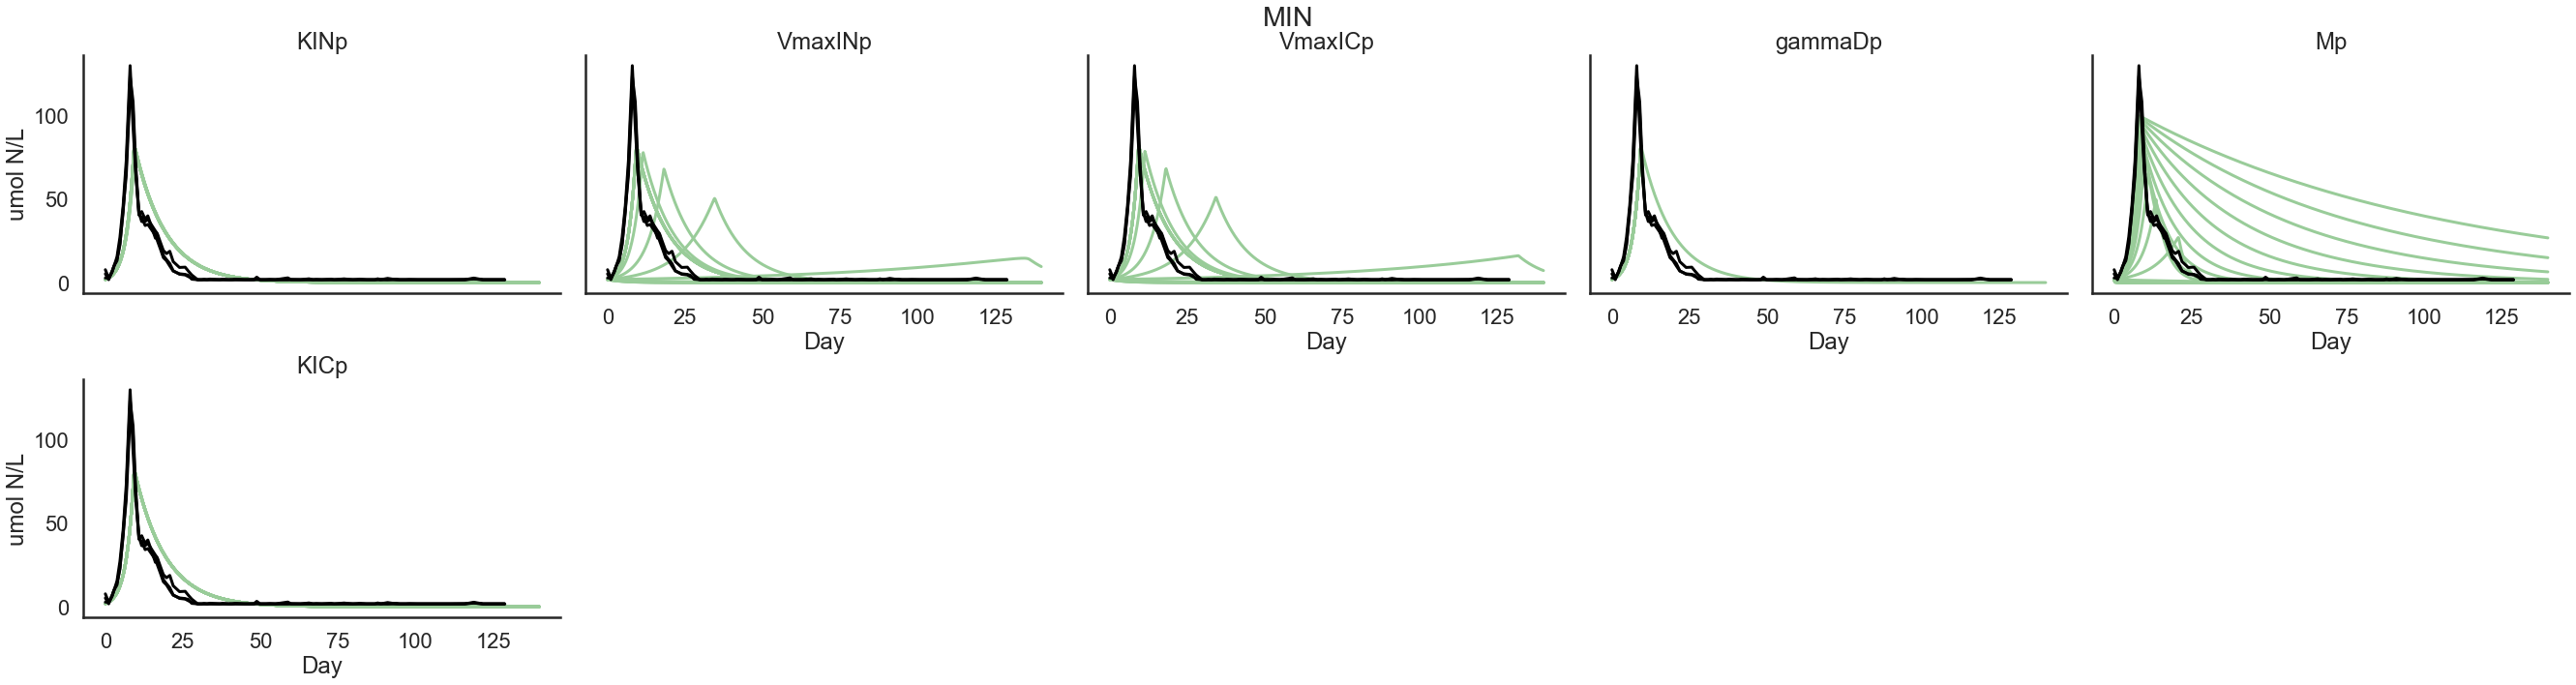

In [31]:
for m in ponlydf.model.unique():
    mdf2 = ponlydf.loc[ponlydf.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_wrap=5,
        kind='line', #lw=1,
        aspect=1.5, legend=False,
    )

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    plt.suptitle(m, y=1)
    plt.show()

In [32]:
msefilter_df.loc[msefilter_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      20
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [33]:
lowest_ids = msefilter_df.nsmallest(columns='MSE', n=10)['run_id']

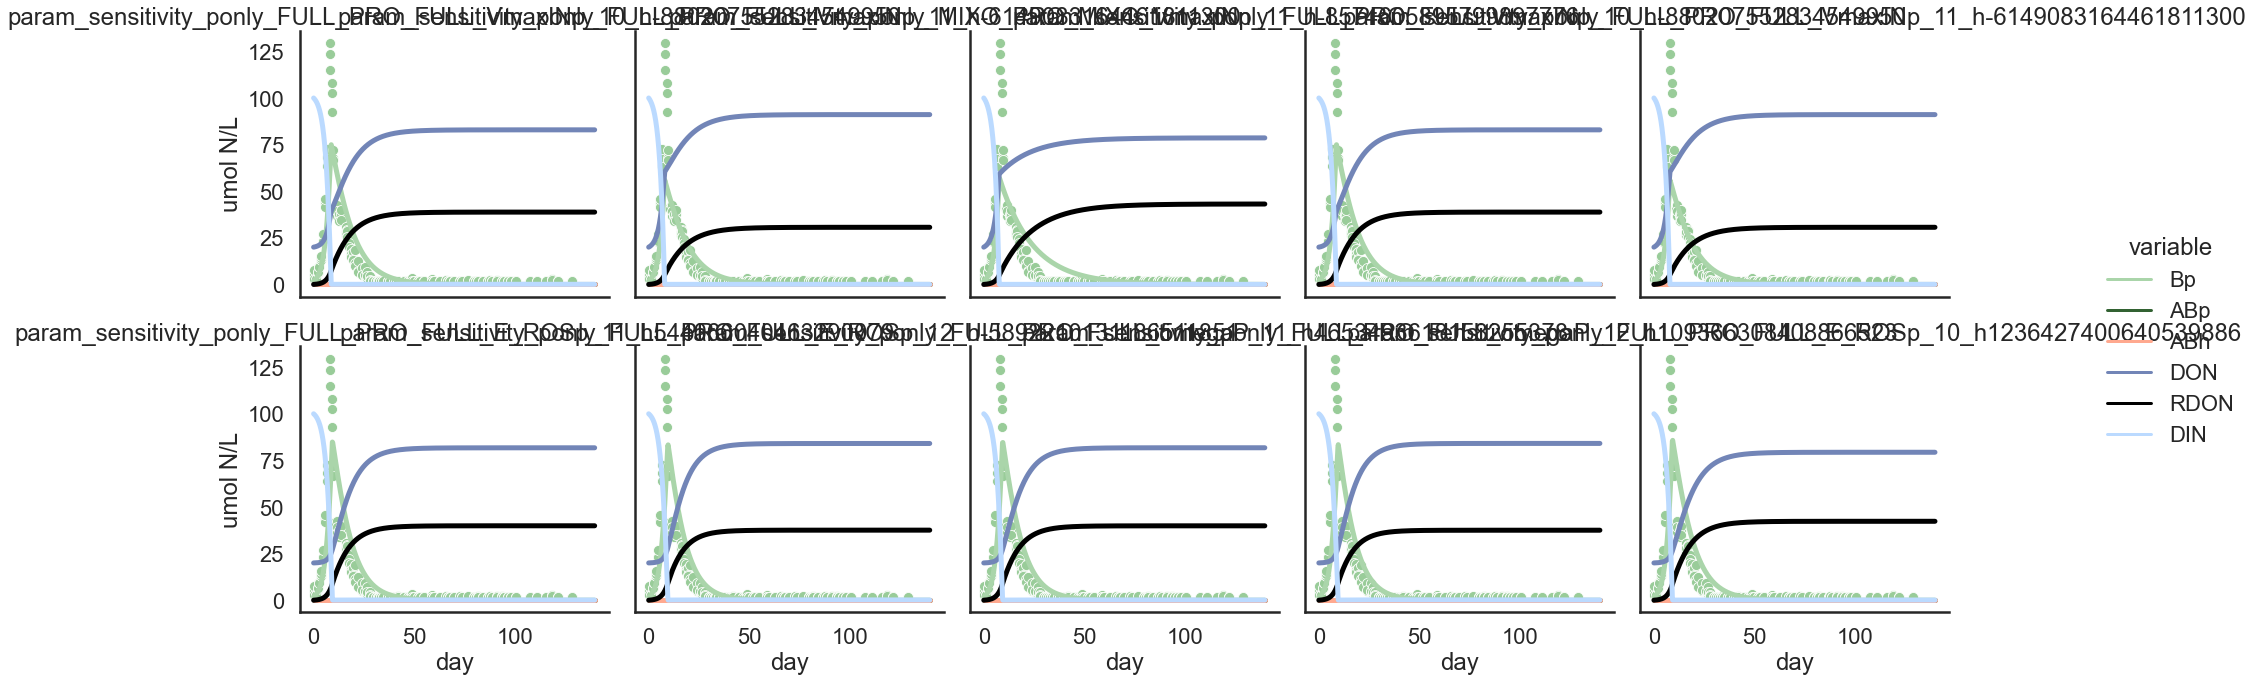

In [34]:
mdf2 = ponlydf.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [35]:
plt.show()

In [36]:
lowest_ids

16296    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
16326    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
18126    param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...
16297    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
16328    param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...
2496     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
2526     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
24126    param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...
24156    param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...
2466     param_sensitivity_ponly_FULL_PRO_FULL_E_ROSp_1...
Name: run_id, dtype: object

In [37]:
ponly_sum_df

,Unnamed: 0,Mh,Mp,gammaDp,gammaDh,Rp,Rh,EOp,EIp,EOh,...,bh,run_id,h_err,p_err,error,logerror,sen_param_model,idx,model,sen_param
1,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxICp_...,NaN,NaN,NaN,NaN,MIXO_VmaxICp,4,MIXO,VmaxICp
2,0,0.000001,1.664873e-07,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_Mp_1_h59...,NaN,NaN,NaN,NaN,FULL_Mp,1,FULL,Mp
4,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000000,0.0,0.000000,...,0.01,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_5_...,NaN,NaN,NaN,NaN,MIN_VmaxINp,5,MIN,VmaxINp
5,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_KINp_0_h...,NaN,NaN,NaN,NaN,MIXO_KINp,0,MIXO,KINp
10,0,0.000001,2.703381e-05,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_15_h-...,NaN,NaN,NaN,NaN,LEAK_Mp,15,LEAK,Mp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_MIXO_PRO_MIXO_KICp_11_...,NaN,NaN,NaN,NaN,MIXO_KICp,11,MIXO,KICp
2008,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_VmaxICp_...,NaN,NaN,NaN,NaN,FULL_VmaxICp,1,FULL,VmaxICp
2012,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_omegaP_1...,NaN,NaN,NaN,NaN,FULL_omegaP,19,FULL,omegaP
2015,0,0.000001,1.157407e-06,0.6,0.6,7.0,4.5,0.000001,0.0,0.000001,...,0.01,param_sensitivity_ponly_FULL_PRO_FULL_KONp_2_h...,NaN,NaN,NaN,NaN,FULL_KONp,2,FULL,KONp


In [38]:
ponly_sum_df.columns

Index(['Unnamed: 0', 'Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh', 'run_id', 'h_err', 'p_err', 'error', 'logerror',
       'sen_param_model', 'idx', 'model', 'sen_param'],
      dtype='object')

In [39]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
param_values_df = ponly_sum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [40]:
msefilter_df = pd.merge(msefilter_df, param_values_df, on=['run_id', 'sen_param'], how='left')

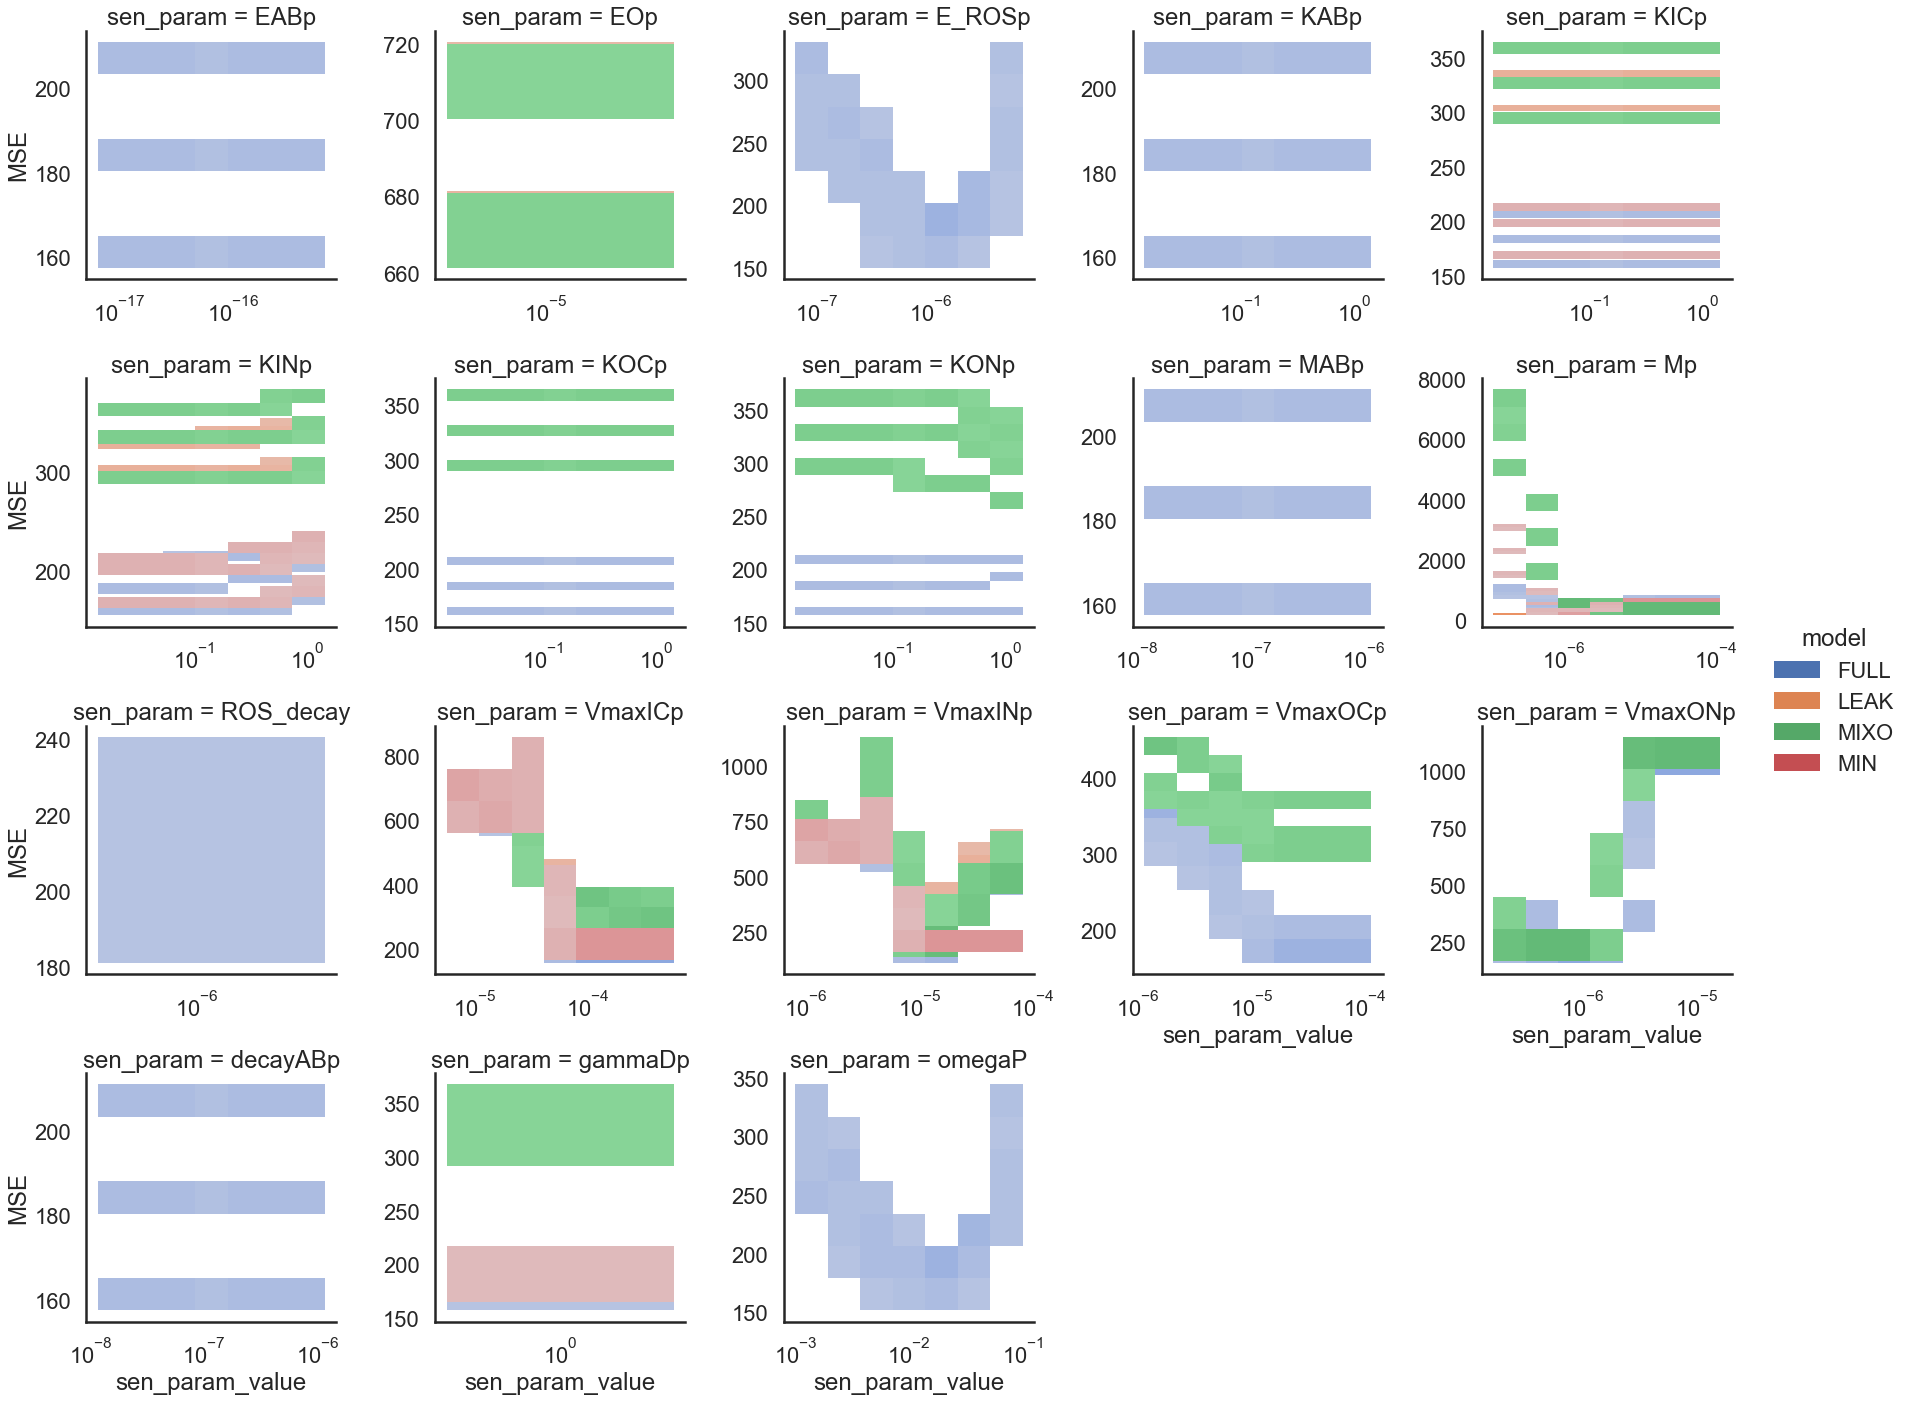

In [41]:
sns.displot(
    data=msefilter_df, x='sen_param_value', y='MSE', log_scale=(True,False), 
    col='sen_param', col_wrap=5, hue='model', 
    facet_kws={'sharey': False, 'sharex': False}, common_bins=False, 
)

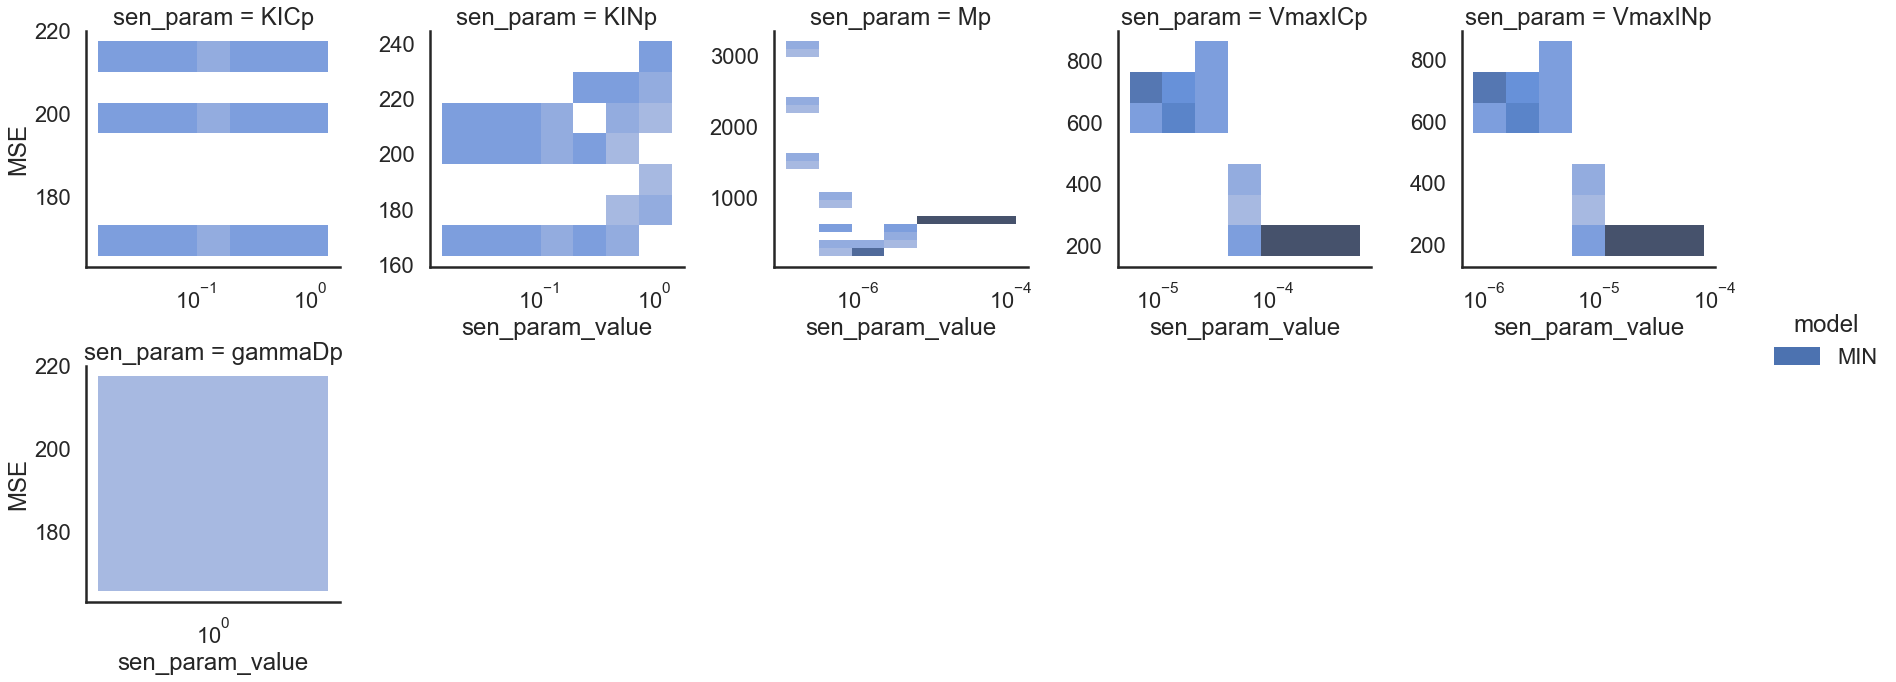

In [42]:
sns.displot(
    data=msefilter_df.loc[msefilter_df.model.isin(['MIN'])], 
    x='sen_param_value', y='MSE', log_scale=(True,False), 
    col='sen_param', col_wrap=5, hue='model', 
    facet_kws={'sharey': False, 'sharex': False}, common_bins=False, 
)

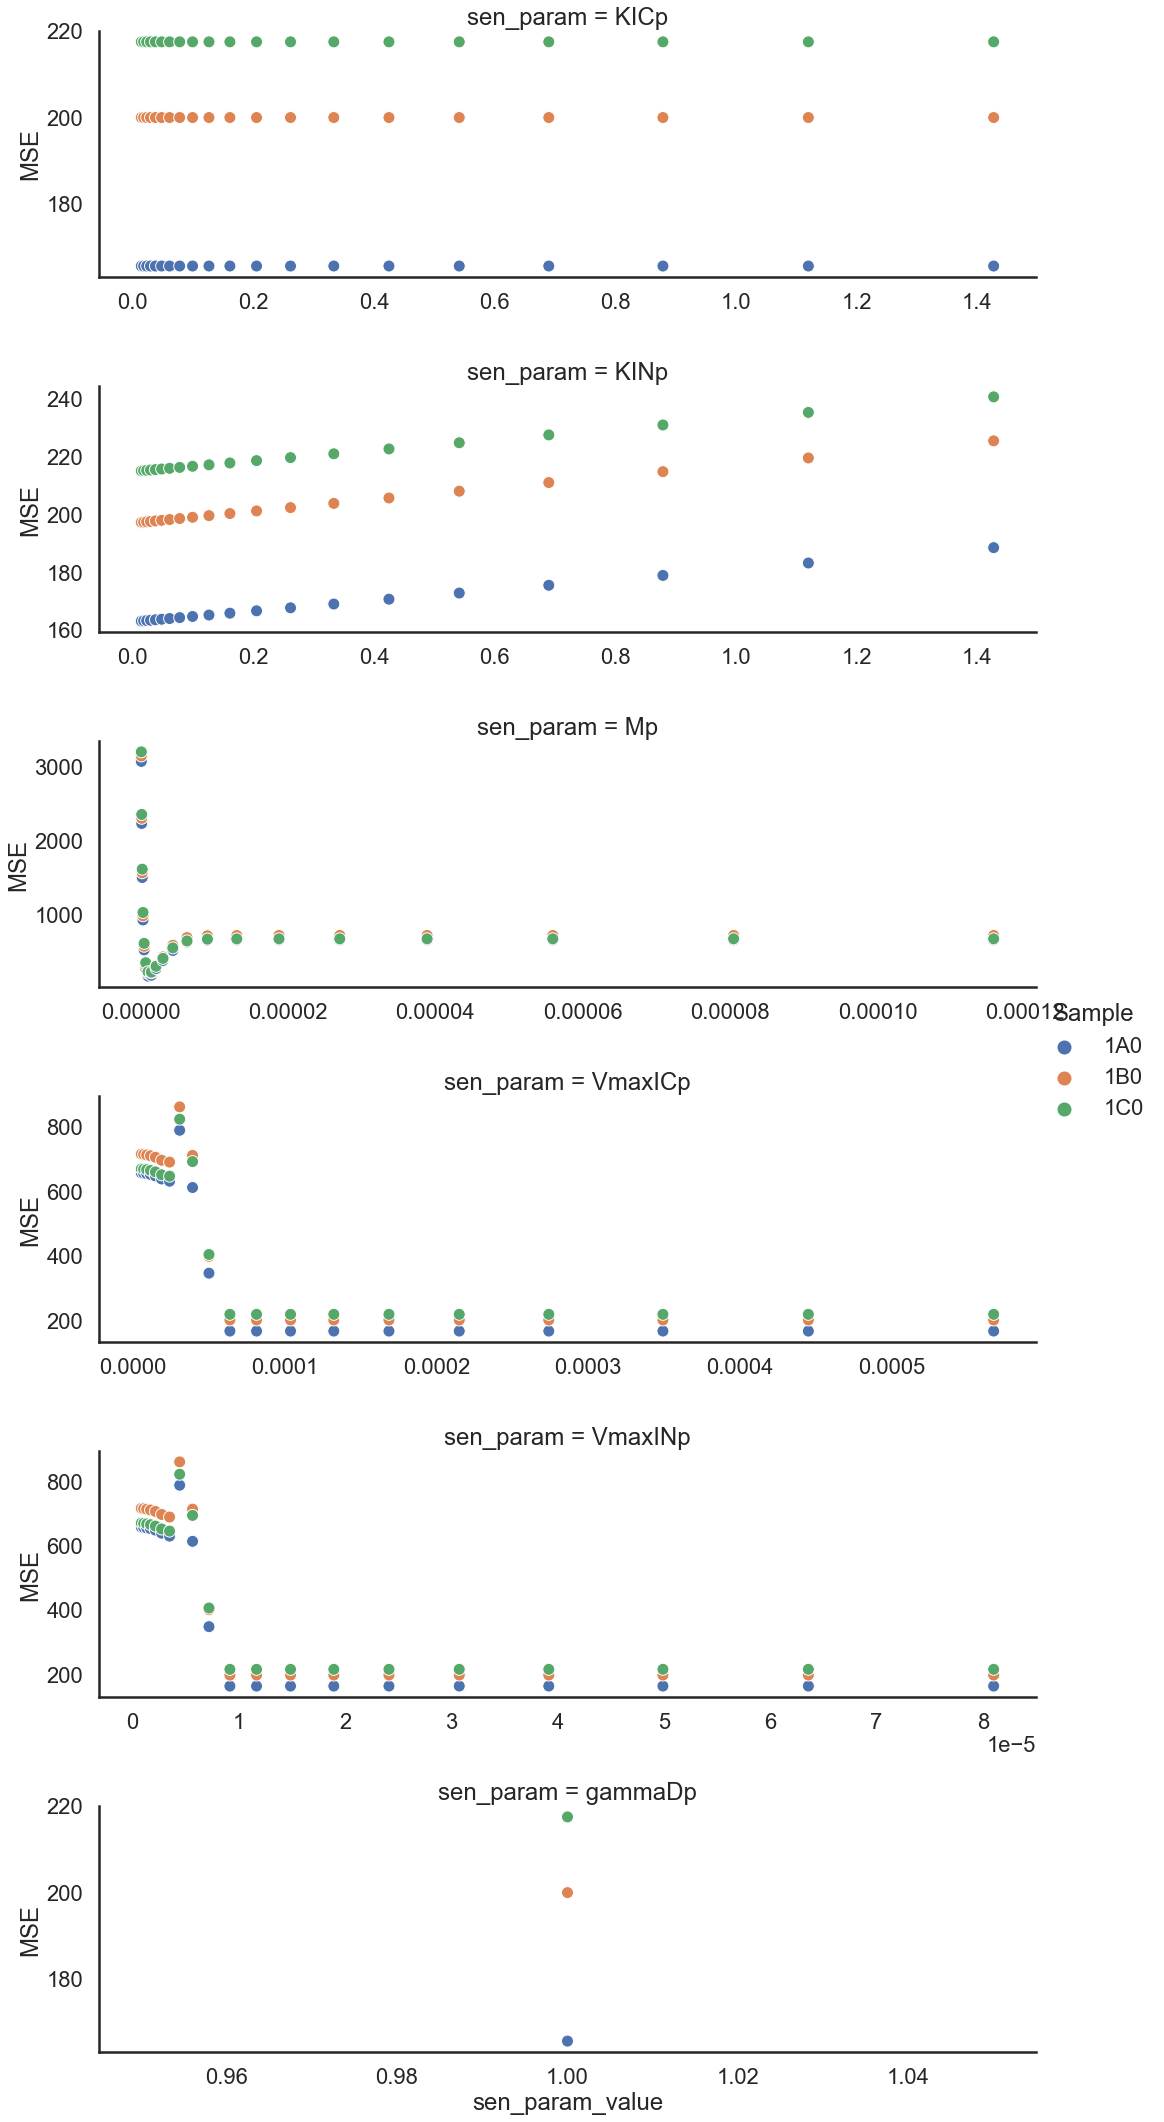

In [43]:
sns.relplot(
    data=msefilter_df.loc[msefilter_df.model.isin(['MIN'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=5,
    hue='Sample', 
    aspect=3,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

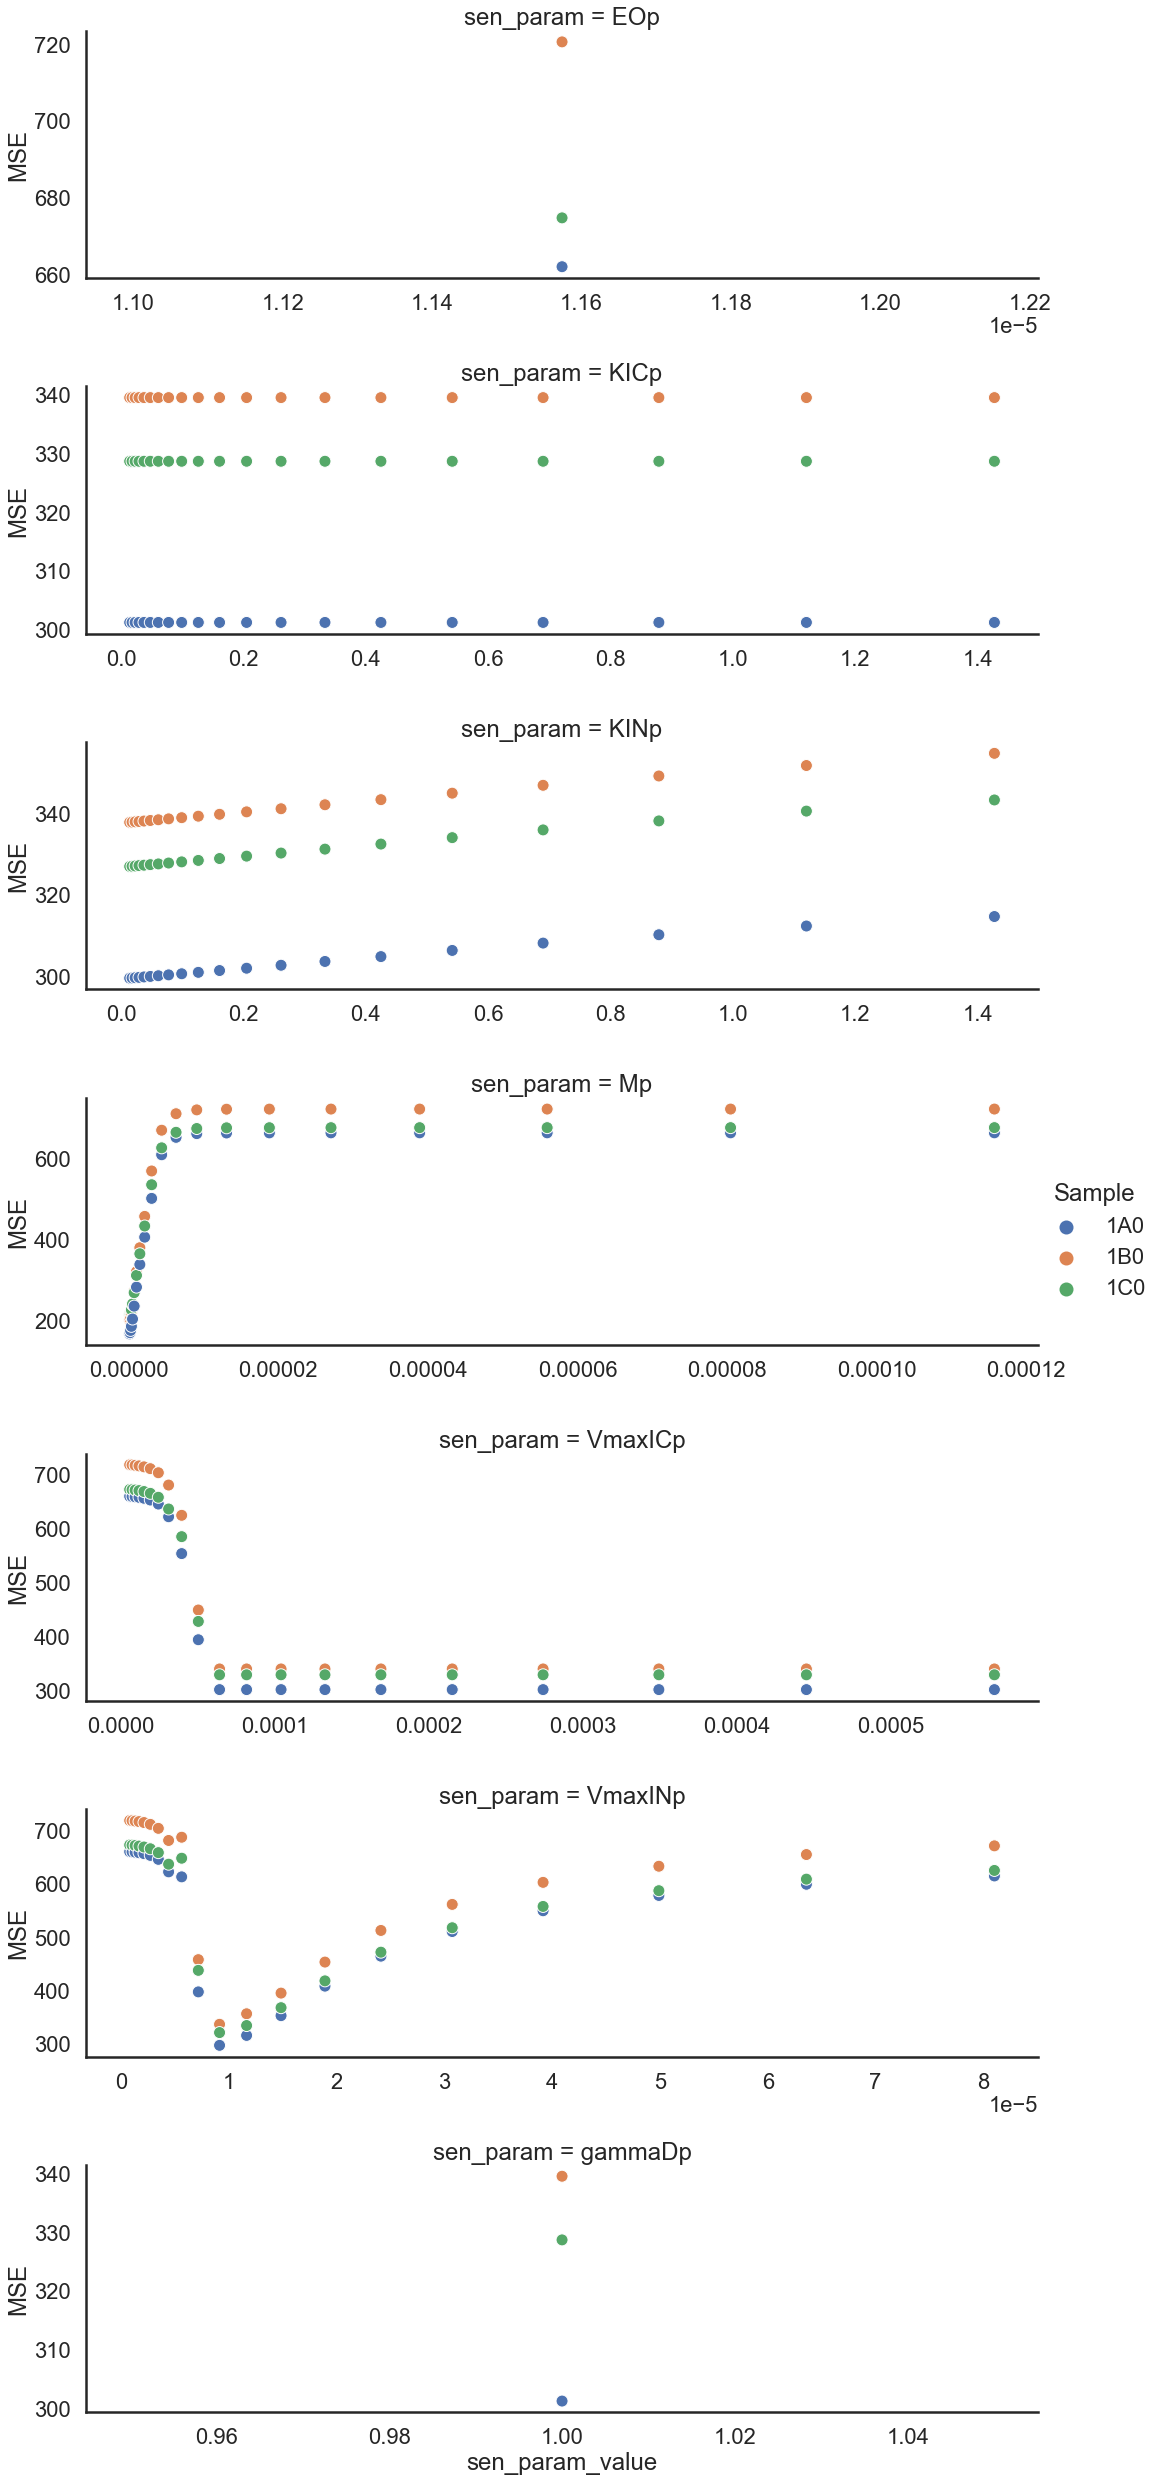

In [50]:
g = sns.relplot(
    data=msefilter_df.loc[msefilter_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=5,
    hue='Sample', 
    aspect=3,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

#for ax in g.axes:
    

In [51]:
msefilter_df.sort_values('MSE').groupby('model').head(3).sort_values(['model', 'MSE'])

,sen_param,model,idx,run_id,Sample,id,full name,Group,compare_points,MSE,sen_param_value
1458,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,114.011222,9.145677e-06
1461,VmaxINp,FULL,11,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,120.944405,1.165411e-05
1459,VmaxINp,FULL,10,param_sensitivity_ponly_FULL_PRO_FULL_VmaxINp_...,1B0,1,Axenic,Axenic,164.0,144.681760,9.145677e-06
1029,Mp,LEAK,0,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_0_h91...,1A0,1,Axenic,Axenic,164.0,168.004914,1.157407e-07
1032,Mp,LEAK,1,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_1_h-6...,1A0,1,Axenic,Axenic,164.0,170.950261,1.664873e-07
1065,Mp,LEAK,2,param_sensitivity_ponly_LEAK_PRO_LEAK_Mp_2_h-7...,1A0,1,Axenic,Axenic,164.0,176.579816,2.394836e-07
1578,VmaxINp,MIN,10,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_10...,1A0,1,Axenic,Axenic,164.0,162.763092,9.145677e-06
1581,VmaxINp,MIN,11,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_11...,1A0,1,Axenic,Axenic,164.0,162.801197,1.165411e-05
1584,VmaxINp,MIN,12,param_sensitivity_ponly_MIN_PRO_MIN_VmaxINp_12...,1A0,1,Axenic,Axenic,164.0,162.828340,1.485054e-05
1641,VmaxINp,MIXO,11,param_sensitivity_ponly_MIXO_PRO_MIXO_VmaxINp_...,1A0,1,Axenic,Axenic,164.0,141.052151,1.165411e-05


In [45]:

msefilter_df.loc[msefilter_df.model.isin(['MIN'])].sort_values(['sen_param','MSE']).to_excel('sensitivity_error.xlsx')

In [46]:
 ((9.1e-9) / 86400) * pro_vol**0.67


In [47]:
0.6 * 1.9e-9 / Qp / seconds_in_day

In [48]:
Qp

In [49]:
# 0.1 N per 1 C per day
0.1*R_P